In [1]:
import os
# os.environ["OMP_NUM_THREADS"] = "1"
# os.environ["OPENBLAS_NUM_THREADS"] = "1"
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
# from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
# from pysb.simulator.bng import B/ngSimulator
from necro_uncal_new_updated import model as model100
# from necro_uncal_new_10tnf import model as model10
# from necro_uncal_new_1tnf import model as model1
# from necro_uncal_new_01tnf import model as model01
import pandas as pd
# alias_model_components(model100, model10, model1, model01)
from scipy import stats
from pysb.simulator import SimulationResult
import seaborn as sns

In [ ]:
for i,l in enumerate(np.linspace(0,1800,500)):
    print(i,":",l)

In [2]:
# clus0_100 = np.load('necro_pars10k_cluster0_5720_mod.npy')
clus1_100 = np.load('necro_pars10k_cluster1_5720_mod.npy')
# clus2_100 = np.load('necro_pars10k_cluster2_5720_mod.npy')

clus31_100 = np.load('/home/ildefog/main/Projects/NecroptosisSens/cluster3/necro_pars10k_cluster31_5720_modsplit20.npy')
clus32_100 = np.load('/home/ildefog/main/Projects/NecroptosisSens/cluster3/necro_pars10k_cluster32_5720_modsplit20.npy')
clus33_100 = np.load('/home/ildefog/main/Projects/NecroptosisSens/cluster3/necro_pars10k_cluster33_5720_modsplit20.npy')

In [3]:
tspan = np.linspace(0,1440,500)
m = model100.components
c1 = 15
c31 = 14
c32 = 15
c33 = 16

In [10]:
lub = 2167
lubm = 72260

In [ ]:
# Parameter('TNF_0', 2326)
# Parameter('TNFR_0', 4800)
# Parameter('TRADD_0', 4696) #4696
# Parameter('RIP1_0', 40000)
# Parameter('TRAF_0', 11776) #11776
# Parameter('cIAP_0', 9000) #9000
# Parameter('A20_0', 9000)
# Parameter('CYLD_0', 9000)
# Parameter('FADD_0', 3109) #3109
# Parameter('flip_L_0', 3900) #3900
# Parameter('Lubac_0', 7226)
# Parameter('C8_0', 3799) #3799
# Parameter('RIP3_0', 10654) #10654
# Parameter('MLKLa_0', 5544) #5544


# Initial(TNF(brec=None), TNF_0)
# Initial(TNFR(blig=None, brip=None, bDD = None), TNFR_0)
# Initial(TRADD(brec=None, brip=None, state='unmod', bDD1 = None, bDD2 = None), TRADD_0)
# Initial(RIP1(bscf=None, btraf=None, bub1=None, bub2=None, bub3=None, bDD = None, bRHIM = None, bMLKL = None, state='unmod'), RIP1_0)
# Initial(TRAF(brip=None, bciap=None, bcyld = None, state='unmod'), TRAF_0)
# Initial(cIAP(btraf=None), cIAP_0)
# Initial(MLKL(bRHIM=None, state='unmod'), MLKLa_0)
# Initial(A20(brip = None), A20_0)
# Initial(CYLD(brip=None, btraf = None), CYLD_0)
# Initial(FADD(bDD=None, bDED1=None, bDED2=None), FADD_0)
# Initial(RIP3(bRHIM=None, bDD = None, state='unmod'), RIP3_0)
# Initial(flip_L(bDED=None, state = 'A'), flip_L_0)
# Initial(LUBAC(brip=None), Lubac_0)
# Initial(C8(bf=None, flip = None, state='I'), C8_0)

In [22]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(param_values=clus1_100[17], num_processors = 10)
c1 = wtclus0.dataframe

2021-01-11 12:16:35.305 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-01-11 12:16:35.317 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-01-11 12:16:35.387 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-01-11 12:16:35.447 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes
2021-01-11 12:16:35.648 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-01-11 12:16:35.650 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-01-11 12:16:35.722 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [23]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(initials = {m.C8(bf=None, flip = None, state='I'):1140},
                         param_values=clus1_100[17], num_processors = 20)
c1kd = wtclus0.dataframe

2021-01-11 12:16:39.791 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-01-11 12:16:39.803 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-01-11 12:16:39.873 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-01-11 12:16:39.935 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2021-01-11 12:16:40.192 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-01-11 12:16:40.193 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-01-11 12:16:40.251 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [24]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(initials = {m.C8(bf=None, flip = None, state='I'): 37990},
                        param_values=clus1_100[17], num_processors = 10)
c1oe = wtclus0.dataframe

2021-01-11 12:16:41.504 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-01-11 12:16:41.516 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-01-11 12:16:41.585 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-01-11 12:16:41.647 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes
2021-01-11 12:16:41.835 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-01-11 12:16:41.837 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-01-11 12:16:41.903 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [17]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(initials = {m.LUBAC(brip=None): lub},
                        param_values=clus31_100[14], num_processors = 10)
c3mkd = wtclus0.dataframe

2021-01-11 12:14:12.699 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-01-11 12:14:12.711 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-01-11 12:14:12.781 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-01-11 12:14:12.843 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes
2021-01-11 12:14:13.025 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-01-11 12:14:13.026 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-01-11 12:14:13.095 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [18]:
#LUBAC(brip=None)
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(initials = {m.LUBAC(brip=None):lubm}, 
                        param_values=clus31_100[14], num_processors = 10)
c3moe = wtclus0.dataframe

2021-01-11 12:14:13.196 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-01-11 12:14:13.207 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-01-11 12:14:13.277 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-01-11 12:14:13.346 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes
2021-01-11 12:14:13.560 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-01-11 12:14:13.562 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-01-11 12:14:13.785 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [19]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(param_values=clus31_100[14], num_processors = 10)
c3m = wtclus0.dataframe

2021-01-11 12:14:13.795 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2021-01-11 12:14:13.800 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2021-01-11 12:14:13.833 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2021-01-11 12:14:13.872 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes
2021-01-11 12:14:14.041 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2021-01-11 12:14:14.042 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2021-01-11 12:14:14.101 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


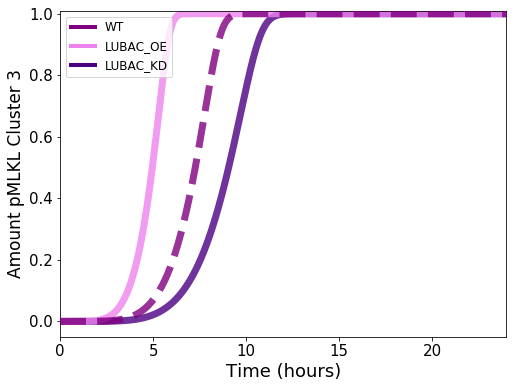

In [21]:
plt.figure(figsize = (8, 6))
plt.plot(tspan/60, c3m['MLKLa_obs'].iloc[:]/5544,lw=7, color ='purple', label = 'WT', linestyle = '--', zorder = 3, alpha = 0.8)
plt.plot(tspan/60, c3moe['MLKLa_obs'].iloc[:]/5544, lw=7, color ='violet', label = 'LUBAC_OE', zorder = 2, alpha = 0.8)
plt.plot(tspan/60, c3mkd['MLKLa_obs'].iloc[:]/5544, lw=7, color ='indigo', label = 'LUBAC_KD', zorder = 1, alpha = 0.8)

# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.07,.07,.07,.07)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .07, fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymax = 1.01)
custom_lines = [Line2D([0], [0], color='purple', lw=4),
               Line2D([0], [0], color='violet', lw=4),
               Line2D([0], [0], color='indigo', lw=4)]
plt.legend(custom_lines, ['WT', 'LUBAC_OE', 'LUBAC_KD'], prop={'size': 12}, loc = 'upper left')
# plt.legend(['WT', 'LUBAC_KD', 'LUBAC_OE'], prop={'size': 12}, loc = 'upper left')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time (hours)', fontsize=18)
plt.ylabel('Amount pMLKL Cluster 3', fontsize=17)
# plt.grid(True)
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0_5720_WTfast_w48dwnratemod.pdf')
plt.grid(False)
plt.savefig('figs/Cluster3/pmlkl_100tnf_clus3e_5720_LUBACoekd_wk14nogrid.pdf')
plt.show() 

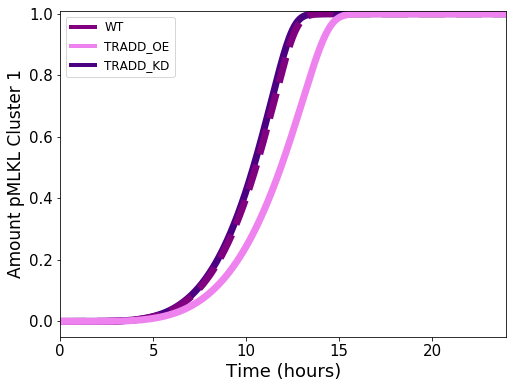

In [28]:
plt.figure(figsize = (8, 6))
plt.plot(tspan/60, c1['MLKLa_obs'].iloc[:]/5544,lw=7, color ='purple',zorder = 2,label = 'WT', linestyle = '--')
plt.plot(tspan/60, c1oe['MLKLa_obs'].iloc[:]/5544, lw=7, color ='violet', label = 'LUBAC_OE')
plt.plot(tspan/60, c1kd['MLKLa_obs'].iloc[:]/5544, lw=7, color ='indigo', zorder =1,label = 'LUBAC_KD')


# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.07,.07,.07,.07)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .07, fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymax = 1.01)
custom_lines = [Line2D([0], [0], color='purple', lw=4),
               Line2D([0], [0], color='violet', lw=4),
               Line2D([0], [0], color='indigo', lw=4)]
plt.legend(custom_lines, ['WT', 'C8_OE', 'C8_KD'], prop={'size': 12}, loc = 'upper left')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time (hours)', fontsize=18)
plt.ylabel('Amount pMLKL Cluster 1', fontsize=17)
# plt.grid(True)
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0_5720_WTfast_w48dwnratemod.pdf')
plt.grid(False)
plt.savefig('figs/Cluster1/pmlkl_100tnf_clus1_5720_C8oekd_wk17nogrid.pdf')
plt.show() 

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(tspan/60, c3m['MLKLa_obs'].iloc[:]/5544,lw=10, color ='royalblue', label = 'WT', zorder = 2, alpha = 5, linestyle = ':')
plt.plot(tspan/60, c3d['MLKLa_obs'].iloc[:]/5544, lw=7, color ='navy', label = 'A20KO', zorder = 1, alpha = 5, linestyle = '--')
plt.plot(tspan/60, c3dn['MLKLa_obs'].iloc[:]/5544, lw=4, color ='navy', zorder = 1, alpha = 5, linestyle = '--')
plt.plot(tspan/60, c3dnn['MLKLa_obs'].iloc[:]/5544, lw=4, color ='navy', zorder = 1, alpha = 5,linestyle = '--')
plt.plot(tspan/60, c3dnnn['MLKLa_obs'].iloc[:]/5544, lw=4, color ='navy',zorder = 1, alpha = 5, linestyle = '--')
plt.plot(tspan/60, c3dnnnn['MLKLa_obs'].iloc[:]/5544, lw=4, color ='navy',zorder = 1, alpha = 5, linestyle = '--')
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.07,.07,.07,.07)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .07, fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
plt.xlim(xmin = 0, xmax = 30)
plt.ylim(ymax = 1.01)
# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                Line2D([0], [0], color='blue', lw=4),
#                Line2D([0], [0], color='blue', lw=4),
#                Line2D([0], [0], color='purple', lw=4),
#                 Line2D([0], [0], color='blue', lw=4)]
plt.legend(['WT', 'WT_delay'], prop={'size': 12}, loc = 'upper left')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time (hours)', fontsize=18)
plt.ylabel('Amount pMLKL Cluster 3', fontsize=17)
# plt.grid(True)
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0_5720_WTfast_w48dwnratemod.pdf')
plt.grid(False)
# plt.savefig('figs/Cluster3/pmlkl_100tnf_clus3_5720_WTdelay_w29upratemodnogrid.pdf')
plt.show() 

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(tspan/60, c3m['MLKLa_obs'].iloc[:]/5544,lw=10, color ='royalblue', label = 'WT', zorder = 2, alpha = 5, linestyle = ':')
plt.plot(tspan/60, c3e['MLKLa_obs'].iloc[:]/5544, lw=7, color ='lightskyblue', label = 'A20KO', zorder = 1, alpha = 5, linestyle = '--')
plt.plot(tspan/60, c3en['MLKLa_obs'].iloc[:]/5544, lw=4, color ='lightskyblue', zorder = 1, alpha = 5, linestyle = '--')
plt.plot(tspan/60, c3enn['MLKLa_obs'].iloc[:]/5544, lw=4, color ='lightskyblue', zorder = 1, alpha = 5,linestyle = '--')
plt.plot(tspan/60, c3ennn['MLKLa_obs'].iloc[:]/5544, lw=4, color ='lightskyblue',zorder = 1, alpha = 5, linestyle = '--')
plt.plot(tspan/60, c3ennnn['MLKLa_obs'].iloc[:]/5544, lw=4, color ='lightskyblue',zorder = 1, alpha = 5, linestyle = '--')
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.07,.07,.07,.07)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .07, fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
plt.xlim(xmin = 0, xmax = 30)
plt.ylim(ymax = 1.01)
# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                Line2D([0], [0], color='blue', lw=4),
#                Line2D([0], [0], color='blue', lw=4),
#                Line2D([0], [0], color='purple', lw=4),
#                 Line2D([0], [0], color='blue', lw=4)]
plt.legend(['WT', 'WT_fast'], prop={'size': 12}, loc = 'upper left')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time (hours)', fontsize=18)
plt.ylabel('Amount pMLKL Cluster 3', fontsize=17)
# plt.grid(True)
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0_5720_WTfast_w48dwnratemod.pdf')
plt.grid(False)
# plt.savefig('figs/Cluster3/pmlkl_100tnf_clus3_5720_WTfast_w23dwnratemodnogrid.pdf')
plt.show() 

In [ ]:
print(len(clus1_100))

In [ ]:
print(len(clus2_100))

In [ ]:
clus0_100e = np.save('necro_pars10k_cluster01_5720_modsplit.npy',clus0_100[sim_idx_to_keep01][:][:, :])
clus0_100m = np.save('necro_pars10k_cluster02_5720_modsplit.npy',clus0_100[sim_idx_to_keep02][:][:, :])
clus0_100d = np.save('necro_pars10k_cluster03_5720_modsplit.npy',clus0_100[sim_idx_to_keep03][:][:, :])

In [ ]:
clus3_100e = np.save('necro_pars10k_cluster31_5720_modsplit.npy',clus3_100[sim_idx_to_keep31][:][:, :])
clus3_100m = np.save('necro_pars10k_cluster32_5720_modsplit.npy',clus3_100[sim_idx_to_keep32][:][:, :])
clus3_100d = np.save('necro_pars10k_cluster33_5720_modsplit.npy',clus3_100[sim_idx_to_keep33][:][:, :])

In [ ]:
clus3_100e = np.load('necro_pars10k_cluster31_5720_modsplit.npy')
clus3_100m = np.load('necro_pars10k_cluster32_5720_modsplit.npy')
clus3_100d = np.load('necro_pars10k_cluster33_5720_modsplit.npy')

In [ ]:
clus3mode = clus3_100e[:, 14:]
clus3modm = clus3_100m[:, 14:]
clus3modd = clus3_100d[:, 14:]

In [ ]:
print(len(clus0_100d))

In [ ]:
clus3_100en = np.load('necro_pars10k_cluster31_5720_modsplit.npy')
clus3_100enn = np.load('necro_pars10k_cluster31_5720_modsplit.npy') 
clus3_100ennn = np.load('necro_pars10k_cluster31_5720_modsplit.npy')
clus3_100ennnn = np.load('necro_pars10k_cluster31_5720_modsplit.npy')

In [ ]:
clus3_100dn = np.load('necro_pars10k_cluster33_5720_modsplit.npy')
clus3_100dnn = np.load('necro_pars10k_cluster33_5720_modsplit.npy') 
clus3_100dnnn = np.load('necro_pars10k_cluster33_5720_modsplit.npy')
clus3_100dnnnn = np.load('necro_pars10k_cluster33_5720_modsplit.npy')

In [ ]:
sim_idx_to_keep01ee

In [ ]:
g = 29

In [ ]:
p = 26

In [ ]:
a = 46

In [ ]:
clus3_100dn[:][:,p] = clus3_100dn[:][:,p]/10
clus3_100dnn[:][:,p] = clus3_100dnn[:][:,p]/100
clus3_100dnnn[:][:,p] = clus3_100dnnn[:][:,p]/1000
clus3_100dnnnn[:][:,p] = clus3_100dnnnn[:][:,p]/10000

In [ ]:
clus3_100dn[:][:,g] = clus3_100dn[:][:,g]*10
clus3_100dnn[:][:,g] = clus3_100dnn[:][:,g]*100
clus3_100dnnn[:][:,g] = clus3_100dnnn[:][:,g]*1000
clus3_100dnnnn[:][:,g] = clus3_100dnnnn[:][:,g]*10000

In [ ]:
clus3_100en[:][:,g] = clus3_100en[:][:,g]*10
clus3_100enn[:][:,g] = clus3_100enn[:][:,g]*10
clus3_100ennn[:][:,g] = clus3_100ennn[:][:,g]*100
clus3_100ennnn[:][:,g] = clus3_100ennnn[:][:,g]*1000

In [ ]:
clus3_100en[:][:,p] = clus3_100en[:][:,p]/10
clus3_100enn[:][:,p] = clus3_100enn[:][:,p]/10
clus3_100ennn[:][:,p] = clus3_100ennn[:][:,p]/100
clus3_100ennnn[:][:,p] = clus3_100ennnn[:][:,p]/1000

In [ ]:
clus3_100dn[:][:,a] = clus3_100dn[:][:,a]*10
clus3_100dnn[:][:,a] = clus3_100dnn[:][:,a]*100
clus3_100dnnn[:][:,a] = clus3_100dnnn[:][:,a]*1000
clus3_100dnnnn[:][:,a] = clus3_100dnnnn[:][:,a]*10000

In [ ]:
# k = [39, 119, 120, 121, 170]
k = 30
# t = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])

In [ ]:
tspan = np.linspace(0, 1800, 500)

In [ ]:
print(c0m['MLKLa_obs'].iloc[267])

In [ ]:
with open('necro_5720clus0m_paramsk39.txt', 'w') as f:
   for p, v in zip(model100.parameters, wtclus0n.param_values[0]):
       f.write('{},{:e}\n'.format(p.name, v))

In [ ]:
with open('necro_5720clus0e_paramsk39.txt', 'w') as f:
   for p, v in zip(model100.parameters, wtclus01n.param_values[0]):
       f.write('{},{:e}\n'.format(p.name, v))

In [ ]:
k = 27

In [ ]:
solverwt3n = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus3n = solverwt3n.run(param_values=clus3_100, num_processors = 10)
c3 = wtclus3n.dataframe

In [ ]:
solverwt3n = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus3n = solverwt3n.run(param_values=clus3_100m, num_processors = 10)
c3m = wtclus3n.dataframe

In [ ]:
solverwt31n = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus31n = solverwt31n.run(param_values=clus3_100e, num_processors = 10)
c3e = wtclus31n.dataframe

In [ ]:
solverwt32n = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus32n = solverwt32n.run(param_values=clus3_100d, num_processors = 10)
c3d = wtclus32n.dataframe

In [ ]:
plt.figure(figsize = (8, 6))
for n in range(len(clus3_100m)):
    plt.plot(tspan/60, c3m.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=10, color ='firebrick', label = 'WT', zorder = 2, alpha = 5, linestyle = ':')
for n in range(len(clus3_100e)):
    plt.plot(tspan/60, c3e.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=7, color ='lightcoral', label = 'A20KO', zorder = 1, alpha = 5, linestyle = '--')
for n in range(len(clus3_100d)):
    plt.plot(tspan/60, c3d.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=4, color ='darkred', zorder = 1, alpha = 5, linestyle = '--')

plt.xlim(xmin = 0, xmax = 30)
plt.ylim(ymax = 1.01)
# plt.legend(['WT', 'WT_fast'], prop={'size': 12}, loc = 'upper left')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Time (hours)', fontsize=18)
plt.ylabel('Amount pMLKL Cluster 3', fontsize=17)
# plt.grid(True)
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0_5720_WTfast_w48dwnratemod.pdf')
plt.grid(False)
plt.savefig('figs/Cluster3/pmlkl_100tnf_clus3_5720_allemdcolors_nogrid.pdf')
plt.show() 

In [ ]:
solverwt3n = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus3n = solverwt3n.run(param_values=clus3_100e, num_processors = 10)
c31 = wtclus3n.dataframe

In [ ]:
solverwt31n = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus31n = solverwt31n.run(param_values=clus3_100m, num_processors = 20)
c32 = wtclus31n.dataframe

In [ ]:
solverwt32n = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus32n = solverwt32n.run(param_values=clus3_100d, num_processors = 20)
c33 = wtclus32n.dataframe

In [ ]:
plt.figure(figsize = (11,7))
for i in range(len(clus3_100e)):
    plt.plot(tspan, c31.loc[i]['MLKLa_obs'].iloc[:], zorder = 1, alpha = 1,color = 'teal')
# for i in range(len(clus3_100d)):
#     plt.plot(tspan, c33.loc[i]['MLKLa_obs'].iloc[:], zorder = 1, alpha = 1,color = 'firebrick')
# for i in range(len(clus3_100m)):
#     plt.plot(tspan, c32.loc[i]['MLKLa_obs'].iloc[:], zorder = 1, alpha = 1,color = 'lightcoral')    
plt.axvline(x=350, color = 'black')
# plt.axvline(x=720, color = 'black', linestyle = '--')
plt.axhline(y=2772, color = 'black')
# plt.xlim(xmax = 900, xmin = 200)    
plt.show()  

In [ ]:
for i,p in enumerate(tspan):
    print(i,p)

In [ ]:
sim_idx_to_keep01newe = [idx for idx in range(len(clus3_100e)) if c31['MLKLa_obs'][idx].iloc[98] > 2772]
sim_idx_to_keep01newe

In [ ]:
with open('necro_5720clus0d_paramsk39.txt', 'w') as f:
   for p, v in zip(model100.parameters, wtclus02n.param_values[0]):
       f.write('{},{:e}\n'.format(p.name, v))

In [ ]:
sim_idx_to_keep01newe = [idx for idx in range(len(clus0_100e)) if c0e['MLKLa_obs'][idx].iloc[99] > 2772]
sim_idx_to_keep01newe

In [ ]:
k = 27
k1 = 145
#[22, 30, 144, 145]

In [ ]:
#[39, 40, 41, 46]
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(param_values=clus3_100e[40], num_processors = 10)
c0e = wtclus0.dataframe

In [ ]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(param_values=clus3_100m[k], num_processors = 10)
c0m = wtclus0.dataframe

In [ ]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(param_values=clus3_100d[30], num_processors = 10)
c0d = wtclus0.dataframe

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(tspan/60, c0e['MLKLa_obs'].iloc[:]/5544,lw=10, color ='lightskyblue', label = 'WT', zorder = 2, alpha = 5, linestyle = ':')
plt.plot(tspan/60, c0m['MLKLa_obs'].iloc[:]/5544, lw=7, color ='royalblue', label = 'A20KO', zorder = 1, alpha = 5, linestyle = '--')
plt.plot(tspan/60, c0d['MLKLa_obs'].iloc[:]/5544, lw=7, color ='navy', label = 'A20KO', zorder = 1, alpha = 5, linestyle = '--')
# plt.plot(tspan/60, c0en['MLKLa_obs'].iloc[:]/5544, lw=4, color ='lightcoral', zorder = 1, alpha = 5, linestyle = '--')
# plt.plot(tspan/60, c0enn['MLKLa_obs'].iloc[:]/5544, lw=4, color ='lightcoral', zorder = 1, alpha = 5,linestyle = '--')
# plt.plot(tspan/60, c0ennn['MLKLa_obs'].iloc[:]/5544, lw=4, color ='lightcoral',zorder = 1, alpha = 5, linestyle = '--')
# plt.plot(tspan/60, c0ennnn['MLKLa_obs'].iloc[:]/5544, lw=4, color ='lightcoral',zorder = 1, alpha = 5, linestyle = '--')
# # plt.errorbar(x1001/60, y1001,
# #              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
# #              (.07,.07,.07,.07)],
# #                    fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
# # plt.errorbar(x1002/60, y1002,
# #              yerr= .07, fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
# plt.xlim(xmin = 0, xmax = 30)
# plt.ylim(ymax = 1.01)
# # custom_lines = [Line2D([0], [0], color='blue', lw=4),
# #                Line2D([0], [0], color='blue', lw=4),
# #                Line2D([0], [0], color='blue', lw=4),
# #                Line2D([0], [0], color='purple', lw=4),
# #                 Line2D([0], [0], color='blue', lw=4)]
# plt.legend(['WT', 'WT_fast'], prop={'size': 12}, loc = 'upper left')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Time (hours)', fontsize=18)
plt.ylabel('Amount pMLKL Cluster 0', fontsize=17)
# # plt.grid(True)
# # plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0_5720_WTfast_w48dwnratemod.pdf')
# plt.grid(False)
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0_5720_WTfast_w48dwnratemodnogrid.pdf')
plt.show() 

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(tspan/60, c0e['MLKLa_obs'].iloc[:]/5544,lw=10, color ='lightcoral', label = 'WT', zorder = 2, alpha = 5, linestyle = ':')
plt.plot(tspan/60, c0m['MLKLa_obs'].iloc[:]/5544, lw=7, color ='red', label = 'A20KO', zorder = 1, alpha = 5, linestyle = '--')
plt.plot(tspan/60, c0d['MLKLa_obs'].iloc[:]/5544, lw=7, color ='darkred', label = 'A20KO', zorder = 1, alpha = 5, linestyle = '--')
# plt.plot(tspan/60, c0en['MLKLa_obs'].iloc[:]/5544, lw=4, color ='lightcoral', zorder = 1, alpha = 5, linestyle = '--')
# plt.plot(tspan/60, c0enn['MLKLa_obs'].iloc[:]/5544, lw=4, color ='lightcoral', zorder = 1, alpha = 5,linestyle = '--')
# plt.plot(tspan/60, c0ennn['MLKLa_obs'].iloc[:]/5544, lw=4, color ='lightcoral',zorder = 1, alpha = 5, linestyle = '--')
# plt.plot(tspan/60, c0ennnn['MLKLa_obs'].iloc[:]/5544, lw=4, color ='lightcoral',zorder = 1, alpha = 5, linestyle = '--')
# # plt.errorbar(x1001/60, y1001,
# #              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
# #              (.07,.07,.07,.07)],
# #                    fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
# # plt.errorbar(x1002/60, y1002,
# #              yerr= .07, fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
# plt.xlim(xmin = 0, xmax = 30)
# plt.ylim(ymax = 1.01)
# # custom_lines = [Line2D([0], [0], color='blue', lw=4),
# #                Line2D([0], [0], color='blue', lw=4),
# #                Line2D([0], [0], color='blue', lw=4),
# #                Line2D([0], [0], color='purple', lw=4),
# #                 Line2D([0], [0], color='blue', lw=4)]
# plt.legend(['WT', 'WT_fast'], prop={'size': 12}, loc = 'upper left')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Time (hours)', fontsize=18)
plt.ylabel('Amount pMLKL Cluster 0', fontsize=17)
# # plt.grid(True)
# # plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0_5720_WTfast_w48dwnratemod.pdf')
# plt.grid(False)
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0_5720_WTfast_w48dwnratemodnogrid.pdf')
plt.show() 

In [ ]:
ke = 40

In [ ]:
plt.figure(figsize = (11,7))
for n in range(len(clus0_100m)):
#     plt.plot(tspan, c0e.loc[n]['MLKLa_obs'].iloc[:], zorder = 1, alpha = 1,color = 'firebrick')
    plt.plot(tspan, c0m.loc[n]['MLKLa_obs'].iloc[:],zorder = 2, alpha = 0.7, color = 'steelblue')
for i in clus0_100ennn[sim_idx_to_keep01newe]:
    plt.plot(tspan, c0e.loc[i]['MLKLa_obs'].iloc[:], zorder = 1, alpha = 1,color = 'firebrick')
#     plt.plot(tspan, c0en.loc[i]['MLKLa_obs'].iloc[:],zorder = 2, alpha = 0.7, color = 'mediumseagreen')
#     plt.plot(tspan, c0enn.loc[i]['MLKLa_obs'].iloc[:],zorder = 2, alpha = 0.7, color = 'orchid')
    plt.plot(tspan, c0ennn.loc[i]['MLKLa_obs'].iloc[:],zorder = 2, alpha = 0.7, color = 'cyan')
# plt.axvline(x=400, color = 'black')
plt.axvline(x=281, color = 'black', linestyle = '--')
plt.axhline(y=2772, color = 'black')
plt.xlim(xmax = 900, xmin = 200)    
plt.show()  

In [ ]:
plt.figure(figsize = (8, 6))
for n in range(len(clus0_100m)):
#     plt.plot(tspan, c0e.loc[n]['MLKLa_obs'].iloc[:], zorder = 1, alpha = 1,color = 'firebrick')
    plt.plot(tspan/60, c0m.loc[n]['MLKLa_obs'].iloc[:]/5544,zorder = 1, alpha = 0.7, color = 'steelblue')
# plt.plot(tspan/60, c0m['MLKLa_obs'].iloc[:]/5544,lw=10, color ='firebrick', label = 'WT', zorder = 2, alpha = 5, linestyle = ':')
plt.plot(tspan/60, c0e['MLKLa_obs'].iloc[:]/5544, lw=7, color ='darkred', label = 'A20KO', zorder = 2, alpha = 5, linestyle = '--')
plt.plot(tspan/60, c0en['MLKLa_obs'].iloc[:]/5544, lw=4, color ='darkred', zorder = 2, alpha = 5, linestyle = '--')
plt.plot(tspan/60, c0enn['MLKLa_obs'].iloc[:]/5544, lw=4, color ='darkred', zorder = 2, alpha = 5,linestyle = '--')
plt.plot(tspan/60, c0ennn['MLKLa_obs'].iloc[:]/5544, lw=4, color ='darkred',zorder = 2, alpha = 5, linestyle = '--')
# plt.plot(tspan/60, df6['MLKLa_obs'].iloc[:]/5544, lw=4, color ='steelblue',zorder = 1, alpha = 5, linestyle = '--')
# plt.errorbar(x1001/60, y1001, 
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.07,.07,.07,.07)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .07, fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
plt.xlim(xmin = 0, xmax = 30)
plt.ylim(ymax = 1.01)
# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                Line2D([0], [0], color='blue', lw=4),
#                Line2D([0], [0], color='blue', lw=4),
#                Line2D([0], [0], color='purple', lw=4),
#                 Line2D([0], [0], color='blue', lw=4)]
plt.legend(['WT', 'WT_fast'], prop={'size': 12}, loc = 'upper left')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Time (hours)', fontsize=18)
plt.ylabel('Amount pMLKL Cluster 0', fontsize=17)
plt.grid(False)
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0_5720_WTfast_w48dwnratemodnogrid.pdf')
plt.show() 

In [ ]:
plt.figure(figsize = (11,7))
for n in range(len(clus0_100e)):
#     plt.plot(tspan, c0e.loc[n]['MLKLa_obs'].iloc[:], zorder = 1, alpha = 1,color = 'firebrick')
    plt.plot(tspan, c0m.loc[n]['MLKLa_obs'].iloc[:],zorder = 2, alpha = 0.7, color = 'steelblue')
#     plt.plot(tspan, c0en.loc[n]['MLKLa_obs'].iloc[:],zorder = 2, alpha = 0.7, color = 'mediumseagreen')
#     plt.plot(tspan, c0enn.loc[n]['MLKLa_obs'].iloc[:],zorder = 2, alpha = 0.7, color = 'orchid')
    plt.plot(tspan, c0ennn.loc[n]['MLKLa_obs'].iloc[:],zorder = 2, alpha = 0.7, color = 'cyan')
# plt.axvline(x=400, color = 'black')
plt.axvline(x=281, color = 'black', linestyle = '--')
plt.axhline(y=2772, color = 'black')
plt.xlim(xmax = 900, xmin = 200)    
plt.show()  

In [ ]:
clus0_100dn = np.load('necro_pars10k_cluster03_5720_modsplit.npy')
clus0_100dnn = np.load('necro_pars10k_cluster03_5720_modsplit.npy') 
clus0_100dnnn = np.load('necro_pars10k_cluster03_5720_modsplit.npy')
clus0_100dnnnn = np.load('necro_pars10k_cluster03_5720_modsplit.npy')

In [ ]:
g = 34

In [ ]:
p = 48

In [ ]:
a = 46

In [ ]:
clus0_100dn[:][:,p] = clus0_100dn[:][:,p]/10
clus0_100dnn[:][:,p] = clus0_100dnn[:][:,p]/100
clus0_100dnnn[:][:,p] = clus0_100dnnn[:][:,p]/1000
clus0_100dnnnn[:][:,p] = clus0_100dnnnn[:][:,p]/10000

In [ ]:
clus0_100dn[:][:,g] = clus0_100dn[:][:,g]*10
clus0_100dnn[:][:,g] = clus0_100dnn[:][:,g]*100
clus0_100dnnn[:][:,g] = clus0_100dnnn[:][:,g]*1000
clus0_100dnnnn[:][:,g] = clus0_100dnnnn[:][:,g]*10000

In [ ]:
clus0_100dn[:][:,a] = clus0_100dn[:][:,a]*10
clus0_100dnn[:][:,a] = clus0_100dnn[:][:,a]*100
clus0_100dnnn[:][:,a] = clus0_100dnnn[:][:,a]*1000
clus0_100dnnnn[:][:,a] = clus0_100dnnnn[:][:,a]*10000

In [ ]:
sim_idx_to_keep0d = [idx for idx in range(len(clus0_100d)) if c0d['MLKLa_obs'][idx].iloc[305] < 2772]

In [ ]:
print(sim_idx_to_keep0d)

In [ ]:
sim_idx_to_keep01d = [idx for idx in range(len(clus0_100d)) if c0df100wt['MLKLa_obs'][idx].iloc[111] > 2772]

In [ ]:
# k1 = [82, 116, 129, 231, 233, 234, 242]
k1 = 116

In [ ]:
m = model100.components

In [ ]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(initials = {m.A20(brip = None):900000}, param_values=clus0_100d[k1], num_processors = 10)
c0dm = wtclus0.dataframe

In [ ]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(param_values=clus0_100d[k1], num_processors = 10)
c0d = wtclus0.dataframe

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(tspan, c0m['MLKLa_obs'].iloc[:]/5544,lw=10, color ='firebrick', label = 'WT', zorder = 2, alpha = 0.9, linestyle = ':')
plt.plot(tspan, c0d['MLKLa_obs'].iloc[:]/5544, lw=7, color ='darkred', label = 'A20KO', zorder = 1, alpha = 5, linestyle = '--')
plt.plot(tspan, c0dm['MLKLa_obs'].iloc[:]/5544, lw=7, color ='blue', label = 'A20KO', zorder = 1, alpha = 5, linestyle = '--')
plt.legend(['WT', 'WT_fast'], prop={'size': 12}, loc = 'upper left')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Time (hours)', fontsize=18)
plt.ylabel('Amount pMLKL Cluster 0', fontsize=17)
plt.grid(True)
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0_5720_WTdelay_w33upratemod.pdf')
# plt.grid(False)
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0_5720_WTdelay_w33upratemodnogrid.pdf')
plt.show()  

In [ ]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(param_values=clus0_100dn[k1], num_processors = 10)
c0dn = wtclus0.dataframe

In [ ]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(param_values=clus0_100dnn[k1], num_processors = 10)
c0dnn = wtclus0.dataframe

In [ ]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(param_values=clus0_100dnnn[k1], num_processors = 10)
c0dnnn = wtclus0.dataframe

In [ ]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(param_values=clus0_100dnnnn[k1], num_processors = 10)
c0dnnnn = wtclus0.dataframe

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(tspan, c0m['MLKLa_obs'].iloc[:]/5544,lw=10, color ='firebrick', label = 'WT', zorder = 2, alpha = 0.9, linestyle = ':')
plt.plot(tspan, c0d['MLKLa_obs'].iloc[:]/5544, lw=7, color ='darkred', label = 'A20KO', zorder = 1, alpha = 5, linestyle = '--')
plt.plot(tspan, c0dn['MLKLa_obs'].iloc[:]/5544, lw=4, color ='darkred', zorder = 1, alpha = 1, linestyle = '--')
plt.plot(tspan, c0dnn['MLKLa_obs'].iloc[:]/5544, lw=4, color ='darkred', zorder = 1, alpha = 1,linestyle = '--')
plt.plot(tspan, c0dnnn['MLKLa_obs'].iloc[:]/5544, lw=4, color ='darkred',zorder = 1, alpha = 1, linestyle = '--')
plt.plot(tspan, c0dnnnn['MLKLa_obs'].iloc[:]/5544, lw=4, color ='darkred',zorder = 1, alpha = 1, linestyle = '--')
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.07,.07,.07,.07)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .07, fmt='.k', ecolor ='black', alpha = 0.75, zorder = 2)
# plt.xlim(xmin = 0, xmax = 30)
# plt.ylim(ymax = 1.01)
# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                Line2D([0], [0], color='blue', lw=4),
#                Line2D([0], [0], color='blue', lw=4),
#                Line2D([0], [0], color='purple', lw=4),
#                 Line2D([0], [0], color='blue', lw=4)]
plt.legend(['WT', 'WT_fast'], prop={'size': 12}, loc = 'upper left')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Time (hours)', fontsize=18)
plt.ylabel('Amount pMLKL Cluster 0', fontsize=17)
plt.grid(True)
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0_5720_WTdelay_w33upratemod.pdf')
# plt.grid(False)
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0_5720_WTdelay_w33upratemodnogrid.pdf')
plt.show()  

In [ ]:
plt.figure(figsize = (11,7))
for n in range(len(clus0_100d)):
#     plt.plot(tspan, c0d.loc[n]['MLKLa_obs'].iloc[:], zorder = 1, alpha = 1,color = 'firebrick')
    plt.plot(tspan, c0m.loc[n]['MLKLa_obs'].iloc[:],zorder = 1, alpha = 0.7, color = 'steelblue')
#     plt.plot(tspan, c0dn.loc[n]['MLKLa_obs'].iloc[:],zorder = 2, alpha = 0.7, color = 'mediumseagreen')
#     plt.plot(tspan, c0dnn.loc[n]['MLKLa_obs'].iloc[:],zorder = 2, alpha = 0.7, color = 'indianred')
    plt.plot(tspan, c0dnnn.loc[n]['MLKLa_obs'].iloc[:],zorder = 2, alpha = 0.7, color = 'cyan')


# plt.plot(tspan, c0en['MLKLa_obs'].iloc[:],zorder = 2, alpha = 0.7, color = 'mediumseagreen')
# plt.plot(tspan, c0enn['MLKLa_obs'].iloc[:],zorder = 2, alpha = 0.7, color = 'indianred')
# plt.plot(tspan, c0ennn['MLKLa_obs'].iloc[:],zorder = 2, alpha = 0.7, color = 'cyan')
# plt.axvline(x=400, color = 'black')
# plt.axvline(x=281, color = 'black', linestyle = '--')
plt.axhline(y=2772, color = 'black')
plt.xlim(xmin =  200)    
plt.show()  

In [ ]:
sim_idx_to_keep01dnnn = [idx for idx in range(len(clus0_100d)) if c0d['MLKLa_obs'][idx].iloc[278] < 2772]
sim_idx_to_keep01dnnn

In [ ]:
plt.figure(figsize = (11,7))
for n in sim_idx_to_keep:
    plt.plot(tspan, dfcyldn.loc[n]['MLKLa_obs'].iloc[:], zorder = 1, alpha = 1,color = 'mediumseagreen')
    plt.plot(tspan, dfcyldnn.loc[n]['MLKLa_obs'].iloc[:],zorder = 2, alpha = 0.7, color = 'indianred')
plt.xlim(xmax = 1800)    
plt.show()  

In [ ]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(param_values=clus0_100[sim_idx_to_keep01], num_processors = 10)
c0df100wt1 = wtclus0.dataframe

In [ ]:
plt.figure(figsize = (11,7))
for n in sim_idx_to_keep:
    plt.plot(tspan, dfcyldn.loc[n]['MLKLa_obs'].iloc[:], zorder = 1, alpha = 1,color = 'mediumseagreen')
    plt.plot(tspan, dfcyldnn.loc[n]['MLKLa_obs'].iloc[:],zorder = 2, alpha = 0.7, color = 'indianred')
plt.xlim(xmax = 1800)    
plt.show()  

In [ ]:
par_idxs = list(range(14, 26,1))

In [ ]:
for sp_ic in par_idxs:
    data_violin = [0] * 12
    clus_labels = [0] * 12
    count = 0
    for idx, clus in self.clusters.items():
        cluster_pars = self.all_parameters[clus]
        sp_ic_values = cluster_pars[:, sp_ic]
        data_violin[count] = sorted(np.log10(sp_ic_values))
        clus_labels[count] = idx
        count += 1

    fig, ax1 = plt.subplots(nrows=1, ncols=1)
    ax1.set_title('Parameter {0}'.format(self.model.parameters[sp_ic].name))
    ax1.set_ylabel('Parameter values (log10)')
    parts = ax1.violinplot(data_violin, showmeans=False, showmedians=False, showextrema=False)

    for pc in parts['bodies']:
        pc.set_facecolor('#D43F3A')
        pc.set_edgecolor('black')
        pc.set_alpha(1)

    percentile_data = np.array([np.percentile(data, [25, 50, 75]) for data in data_violin])
    quartile1 = percentile_data[:, 0]
    medians = percentile_data[:, 1]
    quartile3 = percentile_data[:, 2]

    whiskers = np.array([_adjacent_values(sorted_array, q1, q3)
                         for sorted_array, q1, q3 in zip(data_violin, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians) + 1)
    ax1.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
    ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
    ax1.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)

In [ ]:
newlist = [np.log10(clus0mod[sim_idx_to_keep01][:][:,0]),
          np.log10(clus0mod[sim_idx_to_keep02][:][:,0]),
          np.log10(clus0mod[sim_idx_to_keep03][:][:,0])]

In [ ]:
mods = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]), 
        np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
        np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])]

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 26,1)) #index for parameter values after initial conditions 14-50
counter = 0

scaling = [2] * 12
# idx = list(range(14, 51,1))
row = 4
col = 3
# counter = 0
n = 50000

ndims = len(idx)
# my_pal1 = {"Cluster0": "indianred","Cluster1":"indianred","indianred":"darkred","Cluster2":"darkred"}
fig = plt.figure(figsize=(20, 15))
for i in range(1,13):
    ax = fig.add_subplot(4, 3, i)
    sns.distplot(np.log10(clus3mode[:][:][:, counter]), hist=True, rug=False, label = 'fast')
    sns.distplot(np.log10(clus3modm[:][:][:, counter]), hist=True, rug=False, label = 'middle')
    sns.distplot(np.log10(clus3modd[:][:][:, counter]), hist=True, rug=False, label = 'delay'
                 , color = 'indianred')
#     sns.distplot(data = [np.log10(clus0mod[:][:, counter]),
#                           np.log10(clus1mod[:][:, counter]),
#                           np.log10(clus2mod[:][:, counter]),
#                           np.log10(clus3mod[:][:, counter])], color = 'indianred')
#     sns.distplot(np.log10(clus0mod[:][:, counter]))
#     sns.distplot(np.log10(clus1mod[:][:, counter]), color = 'indianred')
#     sns.distplot(np.log10(clus2mod[:][:, counter]), color = 'mediumseagreen')
#     sns.distplot(np.log10(clus3mod[:][:, counter]), color = 'gold')
#     sns.distplot(np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]), color = 'indianred', hist=False, rug=True)
#     sns.distplot(np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]), hist=False, rug=True)
    
#     sns.distplot(np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]), color = 'mediumseagreen')
#     sns.violinplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['yellow','yellow','yellow'])
#     sns.swarmplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['lightcoral','firebrick','darkred'])
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]))
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep03][:][:, counter]))
#     xticklabels = ['Cluster0', 'Cluster1', 'Cluster2','Cluster3']
#     ax.set_xticks([0,1,2,3])
#     ax.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6 , 8])
#     ax.set_xticklabels(xticklabels)
# add horizontal grid lines
# plt.ylim(ymax = 25000)
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    # plt.plot(samples[:, counter])
#     sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]), color = 'red')
#     sns.violin(clus0_100[:, 14:][:, counter], color = 'cyan')
#     sns.distplot(clus1_100[:, 14:][:, counter], color = 'red')
#     sns.distplot(clus0mod[sim_idx_to_keep01][:][:, counter], color = 'indianred')
#     sns.distplot(clus0mod[sim_idx_to_keep02][:][:, counter], color = 'mediumseagreen')
#     sns.distplot(clus0mod[sim_idx_to_keep03][:][:, counter], color = 'steelblue')
    plt.title(model100.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = -10, ymax=8)
    plt.xlim(xmin = -10,xmax=6)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
    plt.legend(loc = 'best', prop={'size': 13})
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(26, 38,1)) #index for parameter values after initial conditions 14-50
counter = 0

scaling = [2] * 12
# idx = list(range(14, 51,1))
row = 10
col = 4
# counter = 0
n = 50000

ndims = len(idx)
# my_pal1 = {"Cluster0": "indianred","Cluster1":"indianred","indianred":"darkred","Cluster2":"darkred"}
fig = plt.figure(figsize=(20, 15))
for i in range(1,13):
    ax = fig.add_subplot(4, 3, i)
    sns.distplot(np.log10(clus3mode[:][:][:, counter]), hist=True, rug=False, label = 'fast')
    sns.distplot(np.log10(clus3modm[:][:][:, counter]), hist=True, rug=False, label = 'middle')
    sns.distplot(np.log10(clus3modd[:][:][:, counter]), hist=True, rug=False, label = 'delay'
                , color = 'indianred')
#     sns.distplot(data = [np.log10(clus0mod[:][:, counter]),
#                           np.log10(clus1mod[:][:, counter]),
#                           np.log10(clus2mod[:][:, counter]),
#                           np.log10(clus3mod[:][:, counter])], color = 'indianred')
#     sns.distplot(np.log10(clus0mod[:][:, counter]))
#     sns.distplot(np.log10(clus1mod[:][:, counter]), color = 'indianred')
#     sns.distplot(np.log10(clus2mod[:][:, counter]), color = 'mediumseagreen')
#     sns.distplot(np.log10(clus3mod[:][:, counter]), color = 'gold')
#     sns.distplot(np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]), color = 'indianred', hist=False, rug=True)
#     sns.distplot(np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]), hist=False, rug=True)
    
#     sns.distplot(np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]), color = 'mediumseagreen')
#     sns.violinplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['yellow','yellow','yellow'])
#     sns.swarmplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['lightcoral','firebrick','darkred'])
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]))
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep03][:][:, counter]))
#     xticklabels = ['Cluster0', 'Cluster1', 'Cluster2','Cluster3']
#     ax.set_xticks([0,1,2,3])
#     ax.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6 , 8])
#     ax.set_xticklabels(xticklabels)
# add horizontal grid lines
# plt.ylim(ymax = 25000)
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    # plt.plot(samples[:, counter])
#     sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]), color = 'red')
#     sns.violin(clus0_100[:, 14:][:, counter], color = 'cyan')
#     sns.distplot(clus1_100[:, 14:][:, counter], color = 'red')
#     sns.distplot(clus0mod[sim_idx_to_keep01][:][:, counter], color = 'indianred')
#     sns.distplot(clus0mod[sim_idx_to_keep02][:][:, counter], color = 'mediumseagreen')
#     sns.distplot(clus0mod[sim_idx_to_keep03][:][:, counter], color = 'steelblue')
    plt.title(model100.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = -10, ymax=8)
    plt.xlim(xmin = -10,xmax=6)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
    plt.legend(loc = 'best', prop={'size': 13})
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(38, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0

scaling = [2] * 16
# idx = list(range(14, 51,1))
row = 8
col = 2
# counter = 0
n = 50000

ndims = len(idx)
# my_pal1 = {"Cluster0": "indianred","Cluster1":"indianred","indianred":"darkred","Cluster2":"darkred"}
fig = plt.figure(figsize=(15, 25))
for i in range(1,17):
    ax = fig.add_subplot(8, 2, i)
    sns.distplot(np.log10(clus3mode[:][:][:, counter]), hist=True, rug=False, label = 'fast')
    sns.distplot(np.log10(clus3modm[:][:][:, counter]), hist=True, rug=False, label = 'middle')
    sns.distplot(np.log10(clus3modd[:][:][:, counter]), hist=True, rug=False, label = 'delay'
                , color = 'indianred')
#     sns.distplot(data = [np.log10(clus0mod[:][:, counter]),
#                           np.log10(clus1mod[:][:, counter]),
#                           np.log10(clus2mod[:][:, counter]),
#                           np.log10(clus3mod[:][:, counter])], color = 'indianred')
#     sns.distplot(np.log10(clus0mod[:][:, counter]))
#     sns.distplot(np.log10(clus1mod[:][:, counter]), color = 'indianred')
#     sns.distplot(np.log10(clus2mod[:][:, counter]), color = 'mediumseagreen')
#     sns.distplot(np.log10(clus3mod[:][:, counter]), color = 'gold')
#     sns.distplot(np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]), color = 'indianred', hist=False, rug=True)
#     sns.distplot(np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]), hist=False, rug=True)
    
#     sns.distplot(np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]), color = 'mediumseagreen')
#     sns.violinplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['yellow','yellow','yellow'])
#     sns.swarmplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['lightcoral','firebrick','darkred'])
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]))
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep03][:][:, counter]))
#     xticklabels = ['Cluster0', 'Cluster1', 'Cluster2','Cluster3']
#     ax.set_xticks([0,1,2,3])
#     ax.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6 , 8])
#     ax.set_xticklabels(xticklabels)
# add horizontal grid lines
# plt.ylim(ymax = 25000)
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    # plt.plot(samples[:, counter])
#     sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]), color = 'red')
#     sns.violin(clus0_100[:, 14:][:, counter], color = 'cyan')
#     sns.distplot(clus1_100[:, 14:][:, counter], color = 'red')
#     sns.distplot(clus0mod[sim_idx_to_keep01][:][:, counter], color = 'indianred')
#     sns.distplot(clus0mod[sim_idx_to_keep02][:][:, counter], color = 'mediumseagreen')
#     sns.distplot(clus0mod[sim_idx_to_keep03][:][:, counter], color = 'steelblue')
    plt.title(model100.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = -10, ymax=8)
    plt.xlim(xmin = -10,xmax=6)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
    plt.legend(loc = 'best', prop={'size': 13})
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 26,1)) #index for parameter values after initial conditions 14-50
counter = 0

scaling = [2] * 12
# idx = list(range(14, 51,1))
row = 4
col = 3
# counter = 0
n = 50000

ndims = len(idx)
my_pal1 = {"Early": "lightcoral","Constrained":"firebrick","Delay":"darkred"}
fig = plt.figure(figsize=(20, 15))
for i in range(1,13):
    ax = fig.add_subplot(4, 3, i)
    sns.violinplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
                          np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
                          np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
                          palette=['lightcoral','firebrick','darkred'])
#     sns.violinplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['yellow','yellow','yellow'])
#     sns.swarmplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['lightcoral','firebrick','darkred'])
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]))
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep03][:][:, counter]))
    xticklabels = ['Early', 'Constrained', 'Delayed']
    ax.set_xticks([0,1, 2])
    ax.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6 , 8])
    ax.set_xticklabels(xticklabels)
# add horizontal grid lines
# plt.ylim(ymax = 25000)
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    # plt.plot(samples[:, counter])
#     sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]), color = 'red')
#     sns.violin(clus0_100[:, 14:][:, counter], color = 'cyan')
#     sns.distplot(clus1_100[:, 14:][:, counter], color = 'red')
#     sns.distplot(clus0mod[sim_idx_to_keep01][:][:, counter], color = 'indianred')
#     sns.distplot(clus0mod[sim_idx_to_keep02][:][:, counter], color = 'mediumseagreen')
#     sns.distplot(clus0mod[sim_idx_to_keep03][:][:, counter], color = 'steelblue')
    plt.title(model100.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = -8, ymax=8)
#     plt.xlim(xmin = -5,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(39, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0

scaling = [2] * 15
# idx = list(range(14, 51,1))
row = 5
col = 3
# counter = 0
n = 50000

ndims = len(idx)
# my_pal1 = {"Cluster0": "indianred","Cluster1":"indianred","indianred":"darkred","Cluster2":"darkred"}
fig = plt.figure(figsize=(20, 15))
for i in range(1,16):
    ax = fig.add_subplot(5, 3, i)
    sns.swarmplot(data = [np.log10(clus0mod[:][:, counter]),
                          np.log10(clus1mod[:][:, counter]),
                          np.log10(clus2mod[:][:, counter]),
                          np.log10(clus3mod[:][:, counter])], color = 'indianred')
#     sns.violinplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['yellow','yellow','yellow'])
#     sns.swarmplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['lightcoral','firebrick','darkred'])
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]))
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep03][:][:, counter]))
    xticklabels = ['Cluster0', 'Cluster1', 'Cluster2','Cluster3']
    ax.set_xticks([0,1,2,3])
    ax.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6 , 8])
    ax.set_xticklabels(xticklabels)
# add horizontal grid lines
# plt.ylim(ymax = 25000)
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    # plt.plot(samples[:, counter])
#     sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]), color = 'red')
#     sns.violin(clus0_100[:, 14:][:, counter], color = 'cyan')
#     sns.distplot(clus1_100[:, 14:][:, counter], color = 'red')
#     sns.distplot(clus0mod[sim_idx_to_keep01][:][:, counter], color = 'indianred')
#     sns.distplot(clus0mod[sim_idx_to_keep02][:][:, counter], color = 'mediumseagreen')
#     sns.distplot(clus0mod[sim_idx_to_keep03][:][:, counter], color = 'steelblue')
    plt.title(model100.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
    plt.ylim(ymin = -10, ymax=8)
#     plt.xlim(xmin = -5,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0

scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
# counter = 0
n = 50000

ndims = len(idx)

fig = plt.figure(figsize=(20, 15))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    ax.violinplot(np.log10(clus0mod[sim_idx_to_keep03][:][:, counter]))
    xticklabels = ['Early', 'Constrained', 'Delayed']
    ax.set_xticks([1,2,3])
    ax.set_xticklabels(xticklabels)
# add horizontal grid lines
# plt.ylim(ymax = 25000)
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    # plt.plot(samples[:, counter])
#     sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]), color = 'red')
#     sns.violin(clus0_100[:, 14:][:, counter], color = 'cyan')
#     sns.distplot(clus1_100[:, 14:][:, counter], color = 'red')
#     sns.distplot(clus0mod[sim_idx_to_keep01][:][:, counter], color = 'indianred')
#     sns.distplot(clus0mod[sim_idx_to_keep02][:][:, counter], color = 'mediumseagreen')
#     sns.distplot(clus0mod[sim_idx_to_keep03][:][:, counter], color = 'steelblue')
    plt.title(model100.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymax=0.65)
#     plt.xlim(xmin = -5,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
plt.figure()
sns.distplot(np.log10(clus0mod[:][:, counter]))
plt.show()

In [ ]:
print(clus0mod[sim_idx_to_keep02][:][:,0])
print(clus0mod[sim_idx_to_keep01][:][:,0])
print(clus0mod[sim_idx_to_keep03][:][:,0])

In [ ]:
allsim0 = [clus0mod[sim_idx_to_keep01][:][:,14], 
           clus0mod[sim_idx_to_keep02][:][:,14],
           clus0mod[sim_idx_to_keep03][:][:,14]]

In [ ]:
df_0 = c3df100wt.groupby('simulation')

In [ ]:
df = pd.DataFrame({'A' : clus0mod[sim_idx_to_keep01][:][:,14],
                   'B' : clus0mod[sim_idx_to_keep02][:][:,14],
                   'C' : clus0mod[sim_idx_to_keep03][:][:,14]})

In [ ]:
newlist = [np.log10(clus0mod[sim_idx_to_keep01][:][:,0]),
          np.log10(clus0mod[sim_idx_to_keep02][:][:,0]),
          np.log10(clus0mod[sim_idx_to_keep03][:][:,0])]
newlist2 = [np.log10(clus0mod[sim_idx_to_keep01][:][:,1]),
          np.log10(clus0mod[sim_idx_to_keep02][:][:,1]),
          np.log10(clus0mod[sim_idx_to_keep03][:][:,1])]

In [ ]:
g = 14

In [ ]:
# fig = plt.figure(figsize=(20, 15))
# for i in range(1,41):
#     ax = fig.add_subplot(8, 5, i)
    # plt.plot(samples[:, counter])
# fig = plt.figure(figsize=(20, 5))
fig, axes = plt.subplots(1, 3, figsize=(28, 7), sharex=True)
plt.subplot(131)
# sns.distplot(clus3_100[:, 42])
sns.distplot(clus0mod[sim_idx_to_keep01][:][:,1g])
# sns.distplot(clus2_100[:, 48])
# sns.distplot(clus2_100n[:, 45])
# sns.distplot(clus2_100nn[:, 45])
plt.ylim(ymax=115)
plt.xlim(xmin = -1,xmax=2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.xticks(np.arange(-10, 11, 5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.title('RIP1ub + A20/CYLD -> RIP1ub:A20/CYLD',fontsize=15)
# plt.xlabel("Log(10) Value", fontsize=20)
plt.ylabel("Probability", fontsize=20, labelpad=15)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
               Line2D([0], [0], color='red', lw=4)]
# plt.legend(custom_lines, [r'$RIP1trunc$',r'$Necro$', 'c8rip3trunc'], prop={'size': 15}, loc = 'best')
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)

plt.subplot(132)
# sns.distplot(clus3_100[:, 47])
sns.distplot(clus0mod[sim_idx_to_keep02][:][:,g])
# plt.ylim(ymax=0.0005)
plt.xlim(xmin = -0.5,xmax=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.xticks(np.arange(-10, 11, 5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.title('RIP1ub:A20 -> RIP1ub + A20/CYLD', fontsize=15)
plt.xlabel("Log(10) Value", fontsize=20)
# plt.ylabel("Probability", fontsize=20, labelpad=15)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
# plt.legend(custom_lines, [r'$c8af$',r'$rip3f$'], prop={'size': 15}, loc = 'best')
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
plt.subplot(133)
# sns.distplot(clus2_100[:, 41])
sns.distplot(clus0mod[sim_idx_to_keep03][:][:,g])
# sns.distplot(clus2_100[:, 52])
# plt.ylim(ymax=2)
plt.xlim(xmin = -1,xmax=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.xticks(np.arange(-10, 11, 5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.title('RIP1ub:A20/CYLD -> RIP1deub + A20/CYLD',fontsize=15)
# plt.xlabel("Log(10) Value", fontsize=17)
# plt.ylabel("Probability", fontsize=20, labelpad=15)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
# plt.legend(custom_lines, [r'$c8ar$',r'$rip3r$'], prop={'size': 15}, loc = 'best')
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# fig.savefig("updatedkos/necro_5720_pydream_posta20cyldpardists_allchains5.pdf")
plt.show()

In [ ]:
tspan = np.linspace(0, 1800, 500)
tspan1 = np.linspace(0, 580, 155)
tspan2 = np.linspace(580, 761, 181)
tspan3 = np.linspace(761, 1800, 297)

In [ ]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(param_values=clus0_100, num_processors = 20)
c0df100wt = wtclus0.dataframe

In [ ]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan2, verbose = True)
wtclus0 = solverwt0.run(param_values=clus0_100, num_processors = 20)
c0df100wt22 = wtclus0.dataframe

In [ ]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan3, verbose = True)
wtclus0 = solverwt0.run(param_values=clus0_100, num_processors = 20)
c0df100wt33 = wtclus0.dataframe

In [ ]:
print(c0df100wt.shape)

In [ ]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(param_values=clus0_100[sim_idx_to_keep01], num_processors = 10)
c0df100wt1 = wtclus0.dataframe

In [ ]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(param_values=clus0_100[sim_idx_to_keep02], num_processors = 10)
c0df100wt2 = wtclus0.dataframe

In [ ]:
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(param_values=clus0_100[sim_idx_to_keep03], num_processors = 10)
c0df100wt3 = wtclus0.dataframe

In [ ]:
solverwt1 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus1 = solverwt1.run(param_values=clus1_100)
c1df100wt = wtclus1.dataframe

In [ ]:
solverwt2 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus2 = solverwt2.run(param_values=clus2_100)
c2df100wt = wtclus2.dataframe

In [ ]:
solverwt3 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus3 = solverwt3.run(param_values=clus3_100[sim_idx_to_keepall])
c3df100wt = wtclus3.dataframe

In [ ]:
solverwt3 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus3 = solverwt3.run(param_values=clus3_100[sim_idx_to_keep31])
c3df100wt1 = wtclus3.dataframe

In [ ]:
solverwt3 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus3 = solverwt3.run(param_values=clus3_100[sim_idx_to_keep32])
c3df100wt2 = wtclus3.dataframe

In [ ]:
solverwt3 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus3 = solverwt3.run(param_values=clus3_100[sim_idx_to_keep33])
c3df100wt3 = wtclus3.dataframe

In [ ]:
solverwt3 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus3 = solverwt3.run(param_values=clus3_100[sim_idx_to_keep3], num_processors = 10)
c3df100wtn = wtclus3.dataframe

In [ ]:
for i,l in enumerate(np.linspace(0,1800,500)):
    print(i,":",l)

In [ ]:
plt.figure(figsize = (11,7))
for n in sim_idx_to_keep:
    plt.plot(tspan, dfcyldn.loc[n]['MLKLa_obs'].iloc[:], zorder = 1, alpha = 1,color = 'mediumseagreen')
    plt.plot(tspan, dfcyldnn.loc[n]['MLKLa_obs'].iloc[:],zorder = 2, alpha = 0.7, color = 'indianred')
plt.xlim(xmax = 1800)    
plt.show()  

In [ ]:
sim_idx_to_keep01 = [idx for idx in range(len(clus0_100)) if c0df100wt['MLKLa_obs'][idx].iloc[160] >= 2772]
sim_idx_to_keep02 = [idx for idx in range(len(clus0_100)) if c0df100wt['MLKLa_obs'][idx].iloc[160] < 2772 
                     and c0df100wt['MLKLa_obs'][idx].iloc[196] >= 2772]
sim_idx_to_keep03 = [idx for idx in range(len(clus0_100)) if c0df100wt['MLKLa_obs'][idx].iloc[196] < 2772 
                     and c0df100wt['MLKLa_obs'][idx].iloc[499] >= 2772]
print(len(sim_idx_to_keep01))
print(len(sim_idx_to_keep02))
print(len(sim_idx_to_keep03))

In [ ]:
sim_idx_to_keep01ee = [idx for idx in range(len(clus0_100)) if c0df100wt['MLKLa_obs'][idx].iloc[139] >= 2772]

In [ ]:
sim_idx_to_keep31 = [idx for idx in range(len(clus3_100)) if c3['MLKLa_obs'][idx].iloc[167] >= 2772]
sim_idx_to_keep32 = [idx for idx in range(len(clus3_100)) if c3['MLKLa_obs'][idx].iloc[167] < 2772 
                 and c3['MLKLa_obs'][idx].iloc[203] >= 2772]
sim_idx_to_keep33 = [idx for idx in range(len(clus3_100)) if c3['MLKLa_obs'][idx].iloc[203] < 2772 
                     and c3['MLKLa_obs'][idx].iloc[499] >= 2772]
sim_idx_to_keepall = [idx for idx in range(len(clus3_100)) if c3['MLKLa_obs'][idx].iloc[-1] >= 2772]

# sim_idx_to_keep1 = [idx for idx in range(len(clus1_100)) if c1df100wt['MLKLa_obs'][idx].iloc[-87] > 5544]
# sim_idx_to_keep2 = [idx for idx in range(len(clus2_100)) if c2df100wt['MLKLa_obs'][idx].iloc[-87] > 5544]
# sim_idx_to_keep3 = [idx for idx in range(len(clus3_100)) if c3df100wt['MLKLa_obs'][idx].iloc[-132] < 5000]
print(len(sim_idx_to_keep31))
print(len(sim_idx_to_keep32))
print(len(sim_idx_to_keep33))
print(len(sim_idx_to_keepall))
print(len(clus3_100))
# print(len(sim_idx_to_keepn))

In [ ]:
clus3_100new = np.array([sim_idx_to_keep31,sim_idx_to_keep32,sim_idx_to_keep33])

In [ ]:
print(clus3_100new)

In [ ]:
clus3_100[2807]

In [ ]:
clus3 = [idx for idx in range(len(clus3_100))]

In [ ]:
index = [262, 619, 770, 1139, 1269, 1461, 1528, 1585, 1726, 1733, 
         1759, 2076, 2248, 2319, 2521, 2531, 2729, 2753, 2802, 2807]

clus3_100new = np.delete(clus3_100, index)

In [ ]:
print(len(clus3_100new))
print(len(clus3_100))

In [ ]:
for element in sim_idx_to_keep33:
    if element in sim_idx_to_keeptest:
        sim_idx_to_keeptest.remove(element)

print(len(sim_idx_to_keeptest))

In [ ]:
print(sim_idx_to_keeptest)

In [ ]:
c3df100wt['MLKLa_obs'][:].iloc[:]

In [ ]:
for element in sim_idx_to_keep31:
    if element in sim_idx_to_keep32:
        sim_idx_to_keep32.remove(element)

print(len(sim_idx_to_keep32))

In [ ]:
for element in sim_idx_to_keep32:
    if element in sim_idx_to_keep33:
        sim_idx_to_keep33.remove(element)

print(len(sim_idx_to_keep33))

In [ ]:
for element in sim_idx_to_keep02:
    if element in sim_idx_to_keep03:
        sim_idx_to_keep03.remove(element)

print(len(sim_idx_to_keep03))

In [ ]:
print(len(clus0_100))
print(len(clus1_100))
print(len(clus2_100))
print(len(clus3_100))

In [ ]:
plt.figure(figsize = (11,7))
for n in sim_idx_to_keep01:
    plt.plot(tspan, c0df100wt.loc[n]['MLKLa_obs'].iloc[:], zorder = 1, alpha = 1,color = 'lightcoral')
for n in sim_idx_to_keep02:
    plt.plot(tspan, c0df100wt.loc[n]['MLKLa_obs'].iloc[:], zorder = 1, alpha = 1,color = 'firebrick')    
for n in sim_idx_to_keep03:
    plt.plot(tspan, c0df100wt.loc[n]['MLKLa_obs'].iloc[:], zorder = 1, alpha = 1,color = 'darkred') 
# plt.xlim(xmin =200, xmax = 500)    
plt.axvline(x=550, color = 'black')
plt.axvline(x=761, color = 'black')
plt.axvline(x=1100, color = 'black')
plt.axhline(y=2772, color = 'black')
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0traj_5720newhalfmax_splits.pdf')
plt.show()  

In [ ]:
#[262, 619, 770, 1139, 1269, 1461, 1528, 1585, 1726, 1733, 1759, 2076, 2248, 2319, 2521, 2531, 2729, 2753, 2802, 2807]
plt.figure(figsize = (11,7))
# for n in sim_idx_to_keeptest[0]:
plt.plot(tspan, c3df100wt.loc[2807]['MLKLa_obs'].iloc[:], zorder = 1, alpha = 1,color = 'lightcoral')
# plt.xlim(xmin =200, xmax = 500)    
plt.axvline(x=545, color = 'black')
plt.axvline(x=735, color = 'black')
plt.axhline(y=2772, color = 'black')
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0traj_5720newhalfmax_splits.pdf')
plt.show()  

In [ ]:
c3df100wt.loc[2802]['MLKLa_obs'].iloc[:]

In [ ]:
plt.figure(figsize = (11,7))
for n in sim_idx_to_keep31:
    plt.plot(tspan, c3df100wt.loc[n]['MLKLa_obs'].iloc[:], zorder = 1, alpha = 1,color = 'lightcoral')
for n in sim_idx_to_keep32:
    plt.plot(tspan, c3df100wt.loc[n]['MLKLa_obs'].iloc[:], zorder = 1, alpha = 1,color = 'firebrick')    
for n in sim_idx_to_keep33:
    plt.plot(tspan, c3df100wt.loc[n]['MLKLa_obs'].iloc[:], zorder = 1, alpha = 1,color = 'darkred') 
# plt.xlim(xmin =200, xmax = 500)    
plt.axvline(x=545, color = 'black')
plt.axvline(x=735, color = 'black')
plt.axhline(y=2772, color = 'black')
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0traj_5720newhalfmax_splits.pdf')
plt.show()  

In [ ]:
threshold2 = 2772

In [ ]:
c0df100wt1[:197]

In [ ]:
# df_threshtimesc0100wt0 = c0df100wt.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc0100wt1 = c0df100wt1.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc0100wt2 = c0df100wt2.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc0100wt3 = c0df100wt3.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])

In [ ]:
df_threshtimesc3100wt0 = c3.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])

In [ ]:
# df_threshtimesc3100wt0 = c3df100wt.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc3100wt1 = c3e.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc3100wt2 = c3m.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc3100wt3 = c3d.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])

In [ ]:
# df_threshtimesc3100wt0 = c3df100wt.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc3100wt31 = c31.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc3100wt32 = c32.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc3100wt33 = c33.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])

In [ ]:
cluswtall10 = pd.DataFrame({'WT_early': df_threshtimesc0100wt0['MLKLa_obs']})

In [ ]:
cluswtall1 = pd.DataFrame({'WT_early': df_threshtimesc0100wt1['MLKLa_obs']})
cluswtall2 = pd.DataFrame({'WT_constrained': df_threshtimesc0100wt2['MLKLa_obs']})
cluswtall3 = pd.DataFrame({'Cluster0': df_threshtimesc0100wt3['MLKLa_obs']})

In [ ]:
# cluswtall3 = pd.DataFrame({'WT_early': df_threshtimesc3100wt0['MLKLa_obs']})
cluswtall31 = pd.DataFrame({'WT_early': df_threshtimesc3100wt1['MLKLa_obs']})
cluswtall32 = pd.DataFrame({'WT_constrained': df_threshtimesc3100wt2['MLKLa_obs']})
cluswtall33 = pd.DataFrame({'Cluster3': df_threshtimesc3100wt3['MLKLa_obs']})

In [ ]:
cluswtall31s = pd.DataFrame({'WT_early': df_threshtimesc3100wt31['MLKLa_obs']})
cluswtall32s = pd.DataFrame({'WT_constrained': df_threshtimesc3100wt32['MLKLa_obs']})
cluswtall33s = pd.DataFrame({'Cluster3': df_threshtimesc3100wt33['MLKLa_obs']})

In [ ]:
cluswtall3 = pd.DataFrame({'WT': df_threshtimesc3100wt0['MLKLa_obs']})

In [ ]:
dfwt = pd.DataFrame(data = cluswtall, columns = ['WT_early','WT_constrained','WT_delay'])

In [ ]:
dfwt = pd.DataFrame(data = cluswtall)

In [ ]:
plt.figure(figsize = (20,6))
my_pal1 = {"WT_early": "lightcoral"}
my_pal2 = {"WT_constrained":"firebrick"}
my_pal3 = { "Cluster0":"darkred"}
# sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall3), zorder=2, color = 'indianred', alpha = 0.8)
sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall1), zorder=1, palette=my_pal1)
sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall2), zorder=1, palette=my_pal2)
sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall3), zorder=1, palette=my_pal3)
plt.axvline(x=577, color = 'black', linestyle = '--', lw = 3)
plt.axvline(x=707, color = 'black', linestyle = '--', lw = 3)
plt.axvline(x=500, color = 'black', linestyle = '--', lw = 3)
plt.xlabel("Time (minutes)",fontsize=17)
plt.ylabel("Cluster 0",fontsize=17)
plt.tick_params(labelsize=17)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('figs/pmlkl_100tnf_allcluswkos_swarm_5720modnew.pdf')
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0box_wswarm_5720newhalfmax_splitscolors.pdf')
plt.show()

In [ ]:
plt.figure(figsize = (20,6))
my_pal1 = {"WT_early": "lightcoral"}
my_pal2 = {"WT_constrained":"firebrick"}
my_pal3 = { "Cluster3":"darkred"}
sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall3), zorder=2, color = 'indianred', alpha = 0.8)
plt.axvline(x=587, color = 'black', linestyle = '--', lw = 3)
plt.axvline(x=746, color = 'black', linestyle = '--', lw = 3)
plt.xlabel("Time (minutes)",fontsize=17)
plt.ylabel("Cluster 3",fontsize=17)
plt.tick_params(labelsize=17)
plt.xlim(xmax = 800, xmin = 500)
# plt.savefig('figs/pmlkl_100tnf_allcluswkos_swarm_5720modnew.pdf')
# plt.savefig('figs/Cluster3/pmlkl_100tnf_clus3box_wswarm_5720newhalfmax_WTsplits.pdf')
plt.show()

In [ ]:
plt.figure(figsize = (20,6))
my_pal1 = {"WT_early": "lightcoral"}
my_pal2 = {"WT_constrained":"firebrick"}
my_pal3 = { "Cluster3":"darkred"}
sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall3), zorder=2, color = 'indianred', alpha = 0.8)
plt.axvline(x=587, color = 'black', linestyle = '--', lw = 3)
plt.axvline(x=746, color = 'black', linestyle = '--', lw = 3)
plt.xlabel("Time (minutes)",fontsize=17)
plt.ylabel("Cluster 3",fontsize=17)
plt.tick_params(labelsize=17)
plt.xlim(xmax = 800, xmin = 500)
# plt.savefig('figs/pmlkl_100tnf_allcluswkos_swarm_5720modnew.pdf')
# plt.savefig('figs/Cluster3/pmlkl_100tnf_clus3box_wswarm_5720newhalfmax_WTsplits.pdf')
plt.show()

In [ ]:
plt.figure(figsize = (20,6))
my_pal1 = {"WT_early": "lightskyblue"}
my_pal2 = {"WT_constrained":"royalblue"}
my_pal3 = { "Cluster3":"navy"}
# sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall3), zorder=1, color = 'purple', alpha = 0.8)
# sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall3), zorder=2, color = 'indianred', alpha = 0.8)
sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall31), zorder=2, palette=my_pal1)
sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall32), zorder=2, palette=my_pal2)
sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall33), zorder=2, palette=my_pal3)
plt.axvline(x=602, color = 'black', linestyle = '--', lw = 3)
plt.axvline(x=732, color = 'black', linestyle = '--', lw = 3)
plt.xlabel("Time (minutes)",fontsize=17)
plt.ylabel("Cluster 3",fontsize=17)
plt.tick_params(labelsize=17)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('figs/pmlkl_100tnf_allcluswkos_swarm_5720modnew.pdf')
# plt.savefig('figs/Cluster3/pmlkl_100tnf_clus3box_wswarm_5720newhalfmax_splitscolors.pdf')
plt.show()

In [ ]:
plt.figure(figsize = (20,6))
my_pal1 = {"WT_early": "lightcoral"}
my_pal2 = {"WT_constrained":"cyan"}
my_pal3 = { "Cluster3":"darkred"}
sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall3), zorder=1, color = 'lightskyblue')
# sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall3), zorder=2, color = 'indianred', alpha = 0.8)
# sns.boxplot(x="value", y="variable", data=pd.melt(cluswtall31), zorder=2, palette=my_pal1)
# sns.boxplot(x="value", y="variable", data=pd.melt(cluswtall32), zorder=2, palette=my_pal2)
# sns.boxplot(x="value", y="variable", data=pd.melt(cluswtall33), zorder=2, palette=my_pal3)
plt.axvline(x=602, color = 'black', linestyle = '--', lw = 3)
plt.axvline(x=732, color = 'black', linestyle = '--', lw = 3)
plt.xlabel("Time (minutes)",fontsize=17)
plt.ylabel("Cluster 3",fontsize=17)
plt.tick_params(labelsize=17)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('figs/pmlkl_100tnf_allcluswkos_swarm_5720modnew.pdf')
plt.savefig('figs/Cluster3/pmlkl_100tnf_clus3box_wswarm_5720newhalfmax_WTsplitscolors602732_updatedblues.pdf')
plt.show()

In [ ]:
plt.figure(figsize = (20,6))
my_pal1 = {"WT_early": "lightskyblue"}
my_pal2 = {"WT_constrained":"royalblue"}
my_pal3 = { "Cluster3":"navy"}
# sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall3), zorder=1, color = 'purple', alpha = 0.8)
# sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall3), zorder=2, color = 'indianred', alpha = 0.8)
sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall31s), zorder=2, palette=my_pal1)
sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall32s), zorder=2, palette=my_pal2)
sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall33s), zorder=2, palette=my_pal3)
plt.axvline(x=602, color = 'black', linestyle = '--', lw = 3)
plt.axvline(x=732, color = 'black', linestyle = '--', lw = 3)
plt.xlabel("Time (minutes)",fontsize=17)
plt.xticks(fontsize = 17)
# plt.ylabel("Cluster 3",fontsize=17)
plt.tick_params(labelsize=17)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('figs/pmlkl_100tnf_allcluswkos_swarm_5720modnew.pdf')
plt.savefig('figs/Cluster3/pmlkl_100tnf_clus3box_wswarm_5720newhalfmax_splitscolors602732_updatedblues.pdf')
plt.show()

In [ ]:
plt.figure(figsize = (15,5))
my_pal1 = {"WT_early": "lightcoral"}
my_pal2 = {"WT_constrained":"firebrick"}
my_pal3 = { "WT_delay":"darkred"}
# b=sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall1), zorder=3, palette=my_pal1, alpha = 0.6)
# b=sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall2), zorder=3, palette=my_pal2, alpha = 0.6)
# b=sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall3), zorder=3, palette=my_pal3, alpha = 0.6)
# b2=sns.boxenplot(x="value", y="variable", data=pd.melt(cluswtall1), zorder=3, palette=my_pal1)
# b2=sns.boxenplot(x="value", y="variable", data=pd.melt(cluswtall2), zorder=3, palette=my_pal2)
# b2=sns.boxenplot(x="value", y="variable", data=pd.melt(cluswtall3), zorder=3, palette=my_pal3)
sns.stripplot(x="value", y="variable", data=pd.melt(cluswtall1), zorder=3, palette=my_pal1)
sns.stripplot(x="value", y="variable", data=pd.melt(cluswtall2), zorder=3, palette=my_pal2)
sns.stripplot(x="value", y="variable", data=pd.melt(cluswtall3), zorder=3, palette=my_pal3)
# sns.stripplot(x="value", y="variable", data=pd.melt(cluswtall1), zorder=3, color = 'dimgrey')
# sns.stripplot(x="value", y="variable", data=pd.melt(cluswtall2), zorder=3, color = 'dimgrey')
# sns.stripplot(x="value", y="variable", data=pd.melt(cluswtall3), zorder=3, color = 'dimgrey')
# b2=sns.violinplot(x="value", y="variable", data=pd.melt(cluswtall1), zorder=2, palette=my_pal1)
# b2=sns.violinplot(x="value", y="variable", data=pd.melt(cluswtall2), zorder=2, palette=my_pal2)
# b2=sns.violinplot(x="value", y="variable", data=pd.melt(cluswtall3), zorder=2, palette=my_pal3)
# plt.set_xlabel("Time (minutes)",fontsize=15)
# plt.set_ylabel("All Clusters",fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(xmax = 1500, xmin = 200)
# plt.savefig('figs/pmlkl_100tnf_allcluswkos_swarm_5720modnew.pdf')
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0box_wswarm_5720newhalfmax_splits.pdf')
plt.show()

In [ ]:
plt.figure(figsize = (15,10))
my_pal3 = {"WT0": "indianred", "WT_early": "lightcoral", "WT_constrained":"firebrick", "WT_delay":"darkred"}
sns.violinplot(x="value", y="variable", data=pd.melt(dfwt), zorder=3, palette=my_pal3, alpha = 0.2)
sns.stripplot(x="value", y="variable", data=pd.melt(dfwt), color = 'black')
# plt.set_xlabel("Time (minutes)",fontsize=15)
# plt.set_ylabel("All Clusters",fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('figs/pmlkl_100tnf_allcluswkos_swarm_5720modnew.pdf')
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0box_wswarm_5720newhalfmax_splits.pdf')
plt.show()

In [ ]:
plt.figure()
dfwt.boxplot(patch_artist=True, fontsize = 14)

In [ ]:
df_threshtimesc3100wt0 = c3df100wt.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc3100wt1 = c3df100wt1.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc3100wt2 = c3df100wt2.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc3100wt3 = c3df100wt3.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])

In [ ]:
cluswtall31 = pd.DataFrame({'WT_early': df_threshtimesc3100wt1['MLKLa_obs']})

In [ ]:
cluswtall32 = pd.DataFrame({'WT_constrained': df_threshtimesc3100wt2['MLKLa_obs']})

In [ ]:
cluswtall33 = pd.DataFrame({'WT_delay': df_threshtimesc3100wt3['MLKLa_obs']})

In [ ]:
clusall = pd.DataFrame({'wt3': df_threshtimesc3100wt['MLKLa_obs']})

In [ ]:
dfwt = pd.DataFrame(data = cluswtall, columns = ['WT_early','WT_constrained','WT_delay'])

In [ ]:
dfwt0 = pd.DataFrame(data = clusall, columns = ['wt3'])

In [ ]:
plt.figure(figsize = (15,10))
my_pal0 = {"wt3": "indianred"}
my_pal1 = {"WT_early": "lightcoral"}
my_pal2 = {"WT_constrained":"firebrick"}
my_pal3 = { "WT_delay":"darkred"}
b=sns.boxenplot(x="value", y="variable", data=pd.melt(cluswtall31), zorder=3, palette=my_pal1)
b=sns.boxenplot(x="value", y="variable", data=pd.melt(cluswtall32), zorder=3, palette=my_pal2)
b=sns.boxenplot(x="value", y="variable", data=pd.melt(cluswtall33), zorder=3, palette=my_pal3)
# plt.set_xlabel("Time (minutes)",fontsize=15)
# plt.set_ylabel("All Clusters",fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('figs/pmlkl_100tnf_allcluswkos_swarm_5720modnew.pdf')
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0box_wswarm_5720newhalfmax_splits.pdf')
plt.show()

In [ ]:
plt.figure(figsize = (15,10))
my_pal0 = {"wt3": "indianred"}
my_pal1 = {"WT_early": "lightcoral"}
my_pal2 = {"WT_constrained":"firebrick"}
my_pal3 = { "WT_delay":"darkred"}
b= sns.boxenplot(x="value", y="variable", data=pd.melt(clusall), zorder=3, palette=my_pal0)
# plt.set_xlabel("Time (minutes)",fontsize=15)
# plt.set_ylabel("All Clusters",fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('figs/pmlkl_100tnf_allcluswkos_swarm_5720modnew.pdf')
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0box_wswarm_5720newhalfmax_splits.pdf')
plt.show()

In [ ]:
plt.figure(figsize = (15,5))
my_pal1 = {"WT_early": "lightcoral"}
my_pal2 = {"WT_constrained":"firebrick"}
my_pal3 = { "WT_delay":"darkred"}
b=sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall1), zorder=3, palette=my_pal1, alpha = 0.6)
b=sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall2), zorder=3, palette=my_pal2, alpha = 0.6)
b=sns.swarmplot(x="value", y="variable", data=pd.melt(cluswtall3), zorder=3, palette=my_pal3, alpha = 0.6)
b2=sns.boxenplot(x="value", y="variable", data=pd.melt(cluswtall1), zorder=3, palette=my_pal1)
b2=sns.boxenplot(x="value", y="variable", data=pd.melt(cluswtall2), zorder=3, palette=my_pal2)
b2=sns.boxenplot(x="value", y="variable", data=pd.melt(cluswtall3), zorder=3, palette=my_pal3)
# b2=sns.violinplot(x="value", y="variable", data=pd.melt(cluswtall1), zorder=2, palette=my_pal1)
# b2=sns.violinplot(x="value", y="variable", data=pd.melt(cluswtall2), zorder=2, palette=my_pal2)
# b2=sns.violinplot(x="value", y="variable", data=pd.melt(cluswtall3), zorder=2, palette=my_pal3)
# plt.set_xlabel("Time (minutes)",fontsize=15)
# plt.set_ylabel("All Clusters",fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(xmax = 1500, xmin = 200)
# plt.savefig('figs/pmlkl_100tnf_allcluswkos_swarm_5720modnew.pdf')
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0box_wswarm_5720newhalfmax_splits.pdf')
plt.show()

In [ ]:
plt.figure(figsize = (15,10))
my_pal3 = {"WT0": "indianred", "WT_early": "lightcoral", "WT_constrained":"firebrick", "WT_delay":"darkred"}
sns.violinplot(x="value", y="variable", data=pd.melt(dfwt), zorder=3, palette=my_pal3)
# plt.set_xlabel("Time (minutes)",fontsize=15)
# plt.set_ylabel("All Clusters",fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('figs/pmlkl_100tnf_allcluswkos_swarm_5720modnew.pdf')
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0box_wswarm_5720newhalfmax_splits.pdf')
plt.show()